In [1]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 0.1.dev19056+g5a5f803 
Supposed to be 1.0 (21-11-2022)


In [2]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map

from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    #PowerLawNuisanceSpectralModel,
    #PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys

sys.path.append('/home/katrin/Documents/nuisance_summary/')
from Dataset_Creation import sys_dataset
import Dataset_load 

## Read dataset

In [3]:
dataset_asimov = Dataset_load.create_asimov()

## Single Cases

In [4]:
true_energy = dataset_asimov.exposure.geom.axes[0].center.value
zero = 1e-24

shift = 0
tilt = 0
bias = 0
shift_assumed = 0.1
tilt_assumed = zero
bias_assumed = 0.1

print(tilt)
sys_ = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = shift, 
                        tilt = tilt,
                        resolution = 0,
                       bias = bias,
                        e_reco_creation = 10, 
                        rnd = False)
dataset = sys_.create_dataset()
dataset.models[0].parameters['lon_0'].frozen = True
dataset.models[0].parameters['lat_0'].frozen = True
datasets = Datasets(dataset)    
    
    
dataset_N = sys_.create_dataset_N(10)
## addional parameter bias and resolution (ereco) but are frozen
penalising_invcovmatrix = np.zeros((4, 4))
np.fill_diagonal(penalising_invcovmatrix,
                 [1/bias_assumed**2, 1/zero**2, 1/shift_assumed**2, 1/tilt_assumed**2])

dataset_N.penalising_invcovmatrix = penalising_invcovmatrix
dataset_N.models[0].parameters['lon_0'].frozen = True
dataset_N.models[0].parameters['lat_0'].frozen = True
datasets_N = Datasets(dataset_N)

parlist= ['norm', 'tilt', 'sigma']
for p in parlist:
    datasets.models.parameters[p].frozen = True    
    datasets_N.models.parameters[p].frozen = True

0
ereco init
compute exposure
compute edisp
0.0
evaluate 0.0
ereco init
compute exposure
compute edisp
0.0
evaluate 0.0
ereco init


In [5]:
print(datasets_N.models)

DatasetModels

Component 0: SkyModel

  Name                      : Source
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    lon_0                 (frozen):     83.631       deg         
    lat_0                 (frozen):     22.018       deg         
    sigma                 (frozen):      0.019       deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         

Component 1: FoVBackgroundModel

  Name                      : dataset N-bkg
  Datasets names            : ['dataset N']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
   

In [6]:
import json

def make_writeable(cc):
    d = dict()
    for ii, seg in enumerate(cc.allsegs[0]):
        d['x'] = seg[:,0].tolist()
        d['y'] = seg[:,1].tolist()
    return d

def save(c, name):
    d = make_writeable(c)
    with open(name, 'w') as f:
        json.dump(d, f)
        
def read(name):
    with open(name) as data_file:
        data_loaded = json.load(data_file)
    return data_loaded

## Standard 

In [7]:
%%time
fitting = False
if fitting :
    fit = Fit(store_trace=False)
    minuit_opts = {"tol": 0.01, "strategy": 2}
    fit.optimize_opts = minuit_opts
    result = fit.run(datasets)
    print(result)
    
    c = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.68, 
                                   size = 100, 
                                   )
    save(c, 'data/5_scan_68.json')
    c95 = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.95, 
                                   size = 100, 
                                   )
    save(c95, 'data/5_scan_95.json')
else:
    c = read('data/5_scan_68.json')
    c95 = read('data/5_scan_95.json')


CPU times: user 233 µs, sys: 120 µs, total: 353 µs
Wall time: 326 µs


## Nuisance Parameters

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.42387228729048754
evaluate 0.42387228729048754
compute exposure
compute edisp
-0.42387228729048754
evaluate -0.42387228729048754
compute exposure
compute edisp
0.04238722872904876
evaluate 0.04238722872904876
compute exposure
compute edisp
-0.04238722872904876
evaluate -0.04238722872904876
compute exposure
compute edisp
0.014855035348976598
evaluate 0.014855

compute edisp
0.0008613778045761027
evaluate 0.0008613778045761027
compute exposure
compute edisp
0.0008613600012453279
evaluate 0.0008613600012453279
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.015701596629742815
evaluate 0.015701596629742815
compute exposure
compute edisp
-0.01397890829767854
evaluate -0.01397890829767854
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute expos

compute edisp
0.030370605795725748
evaluate 0.030370605795725748
compute exposure
compute edisp
0.1731490696696067
evaluate 0.1731490696696067
compute exposure
compute edisp
-0.11240785807815519
evaluate -0.11240785807815519
compute exposure
compute edisp
0.048771940226008795
evaluate 0.048771940226008795
compute exposure
compute edisp
0.011969271365442697
evaluate 0.011969271365442697
compute exposure
compute edisp
0.04386486606856651
evaluate 0.04386486606856651
compute exposure
compute edisp
0.016876345522884986
evaluate 0.016876345522884986
compute exposure
compute edisp
0.030370605795725748
evaluate 0.030370605795725748
compute exposure
compute edisp
0.030370605795725748
evaluate 0.030370605795725748
compute exposure
compute edisp
0.030370605795725748
evaluate 0.030370605795725748
compute exposure
compute edisp
0.030370605795725748
evaluate 0.030370605795725748
compute exposure
compute edisp
0.029882890175023106
evaluate 0.029882890175023106
compute exposure
compute edisp
0.027932

compute edisp
0.026705515625656834
evaluate 0.026705515625656834
compute exposure
compute edisp
0.026705507906353173
evaluate 0.026705507906353173
compute exposure
compute edisp
0.026705505011979887
evaluate 0.026705505011979887
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.045854779605801824
evaluate 0.045854779605801824
compute exposure
compute edisp
0.00755622752378721
evaluate 0.00755622752378721
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.02670550356479452
evaluate 0.02670550356479452
compute exposure
compute edisp
0.0267055035647945

compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.024406413914869255
evaluate -0.024406413914869255
compute exposure
compute edisp
-0.02174312827234728
evaluate -0.02174312827234728
compute exposure
compute edisp
-0.02706969955739123
evaluate -0.02706969955739123
compute exposure
compute edisp
-0.02387375678636486
evaluate -0.02387375678636486
compute exposure
compute edisp
-0.02493907104337365
evaluate -0.02493907104337365
compute exposure


ValueError: zero-size array to reduction operation minimum which has no identity

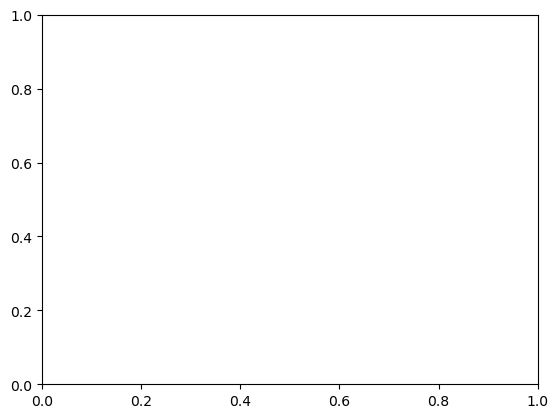

In [8]:
%%time
fitting_N = True
if fitting_N:
    fit_N = Fit(store_trace=False)
    minuit_opts = {"tol": 0.1, "strategy": 2}
    fit_N.optimize_opts = minuit_opts
    result_N = fit_N.run(datasets_N)

    
    c_N = fit_N.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                cl = 0.68, 
                               size = 10, 
                               interpolated = True,
                               )
    
    save(c_N, 'data/5_scan_N_68.json')
    print("95")
    c95_N = fit_N.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                               cl = 0.95, 
                               size = 10, 
                                interpolated = True,
                               )
    save(c95_N, 'data/5_scan_N_95.json')
else:
    c_N = read('data/5_scan_N_68.json')
    #c95_N = read('data/5_scan_N_95.json')

compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0.06116970430177764
evaluate -0.06116970430177764
compute exposure
compute edisp
-0

compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0.05689170095917007
evaluate -0.05689170095917007
compute exposure
compute edisp
-0

compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0.04833569427395493
evaluate -0.04833569427395493
compute exposure
compute edisp
-0

compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0.04405769093134736
evaluate -0.04405769093134736
compute exposure
compute edisp
-0

compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0.03550168424613222
evaluate -0.03550168424613222
compute exposure
compute edisp
-0

compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0.03122368090352464
evaluate -0.03122368090352464
compute exposure
compute edisp
-0

compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.02694567756091707
evaluate -0.02694567756091707
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.0226676742183095
evaluate -0.0226676742183095
compute exposure
compute edisp
-0.02266767421

compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0.01838967087570193
evaluate -0.01838967087570193
compute exposure
compute edisp
-0

compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute exposure
compute edisp
-0.014111667533094355
evaluate -0.014111667533094355
compute e

compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute exposure
compute edisp
-0.005555660847879215
evaluate -0.005555660847879215
compute e

compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
-0.0012776575052716385
evaluate -0.0012776575052716385
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.0030003458373359312
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.0030003458373359312
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.0030003458373359312
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.0030003458373359312
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.0030003458373359312
compute exposure
compute edisp
0.0030003458373359312
evaluate 0.00300034583733593

compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.007278349179943501
evaluate 0.007278349179943501
compute exposure
compute edisp
0.

compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evaluate 0.01583435586515864
compute exposure
compute edisp
0.01583435586515864
evalua

compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evaluate 0.02011235920776621
compute exposure
compute edisp
0.02011235920776621
evalua

compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.028668365892981364
evaluate 0.028668365892981364
compute exposure
compute edisp
0.

compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evaluate 0.03294636923558893
compute exposure
compute edisp
0.03294636923558893
evalua

compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evaluate 0.04150237592080407
compute exposure
compute edisp
0.04150237592080407
evalua

compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evaluate 0.04578037926341164
compute exposure
compute edisp
0.04578037926341164
evalua

compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evaluate 0.05433638594862678
compute exposure
compute edisp
0.05433638594862678
evalua

compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.058614389291234366
evaluate 0.058614389291234366
compute exposure
compute edisp
0.

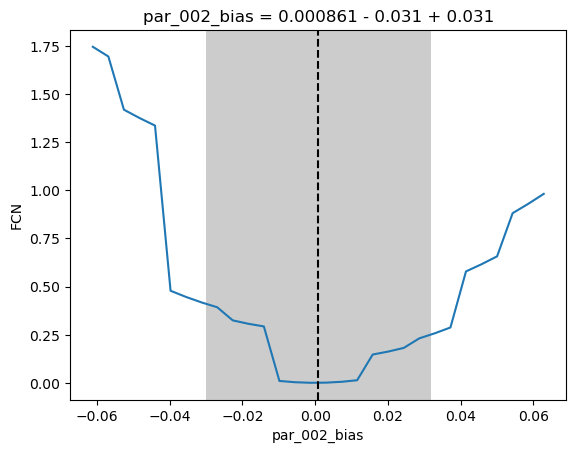

In [14]:
fit_N.minuit.draw_mnprofile("par_002_bias");

In [15]:
fit_N.minuit.parameters

('par_000_index',
 'par_001_amplitude',
 'par_002_bias',
 'par_003_resolution',
 'par_004_norm_nuisance')

In [ ]:
%%time
scan_index_N = fit_N.minuit.draw_mnprofile("par_000_index");

compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007833077928866
evaluate 0.014007833077928866
compute exposure
compute edisp
-0.01228514474586459
evaluate -0.01228514474586459
compute exposure
compute edisp
0.005616007054497228
evaluate 0.005616007054497228
compute exposure
compute edisp
-0.0038933187224329526
evaluate -0.0038933187224329526
compute exposure
compute edisp
0.04324814579799557
evaluate 0.04324814579799557
compute exposure
compute edisp
-0.04152545746593129
evaluate -0.04152545746593129
compute exposure
compute edisp
0.017105874831728284
evaluate 0.017105874831728284
compute exposure
comp

compute edisp
-0.028395847502808127
evaluate -0.028395847502808127
compute exposure
compute edisp
-0.014231793624473294
evaluate -0.014231793624473294
compute exposure
compute edisp
-0.028395847502808127
evaluate -0.028395847502808127
compute exposure
compute edisp
-0.028395847502808127
evaluate -0.028395847502808127
compute exposure
compute edisp
-0.014231793624473294
evaluate -0.014231793624473294
compute exposure
compute edisp
-0.014231793624473294
evaluate -0.014231793624473294
compute exposure
compute edisp
-0.028395847502808127
evaluate -0.028395847502808127
compute exposure
compute edisp
34.89187644205252
evaluate 34.89187644205252
compute exposure
compute edisp
1.7176177669749584
evaluate 1.7176177669749584
compute exposure
compute edisp
0.05890483322108021
evaluate 0.05890483322108021
compute exposure
compute edisp
-0.02403081346661371
evaluate -0.02403081346661371
compute exposure
compute edisp
-0.02755430439223132
evaluate -0.02755430439223132
compute exposure
compute edisp


compute edisp
-0.02668844090073175
evaluate -0.02668844090073175
compute exposure
compute edisp
-0.02668844090073175
evaluate -0.02668844090073175
compute exposure
compute edisp
-0.02668844090073175
evaluate -0.02668844090073175
compute exposure
compute edisp
-0.0078778054695063
evaluate -0.0078778054695063
compute exposure
compute edisp
-0.0454990763319572
evaluate -0.0454990763319572
compute exposure
compute edisp
-0.015150212478323835
evaluate -0.015150212478323835
compute exposure
compute edisp
-0.038226669323139666
evaluate -0.038226669323139666
compute exposure
compute edisp
-0.0034868416327925207
evaluate -0.0034868416327925207
compute exposure
compute edisp
-0.04989004016867098
evaluate -0.04989004016867098
compute exposure
compute edisp
-0.012724021699071752
evaluate -0.012724021699071752
compute exposure
compute edisp
-0.04065286010239175
evaluate -0.04065286010239175
compute exposure
compute edisp
-0.017976715429132914
evaluate -0.017976715429132914
compute exposure
compute 

compute edisp
-0.045373867554598844
evaluate -0.045373867554598844
compute exposure
compute edisp
-0.015191628652302568
evaluate -0.015191628652302568
compute exposure
compute edisp
-0.038144646694365084
evaluate -0.038144646694365084
compute exposure
compute edisp
-0.003561002724912988
evaluate -0.003561002724912988
compute exposure
compute edisp
-0.04977527262175466
evaluate -0.04977527262175466
compute exposure
compute edisp
-0.012756890837394546
evaluate -0.012756890837394546
compute exposure
compute edisp
-0.040579384509273106
evaluate -0.040579384509273106
compute exposure
compute edisp
-0.017989834230376305
evaluate -0.017989834230376305
compute exposure
compute edisp
-0.035346441116291344
evaluate -0.035346441116291344
compute exposure
compute edisp
-0.026668137673333824
evaluate -0.026668137673333824
compute exposure
compute edisp
-0.026668137673333824
evaluate -0.026668137673333824
compute exposure
compute edisp
-0.026668137673333824
evaluate -0.026668137673333824
compute exp

compute edisp
-0.026667318785767724
evaluate -0.026667318785767724
compute exposure
compute edisp
-0.007965535922867941
evaluate -0.007965535922867941
compute exposure
compute edisp
-0.045369101648667504
evaluate -0.045369101648667504
compute exposure
compute edisp
-0.015193084398694453
evaluate -0.015193084398694453
compute exposure
compute edisp
-0.03814155317284099
evaluate -0.03814155317284099
compute exposure
compute edisp
-0.0035635100565662367
evaluate -0.0035635100565662367
compute exposure
compute edisp
-0.04977112751496921
evaluate -0.04977112751496921
compute exposure
compute edisp
-0.012757894384153623
evaluate -0.012757894384153623
compute exposure
compute edisp
-0.040576743187381824
evaluate -0.040576743187381824
compute exposure
compute edisp
-0.017990128431321025
evaluate -0.017990128431321025
compute exposure
compute edisp
-0.03534450914021442
evaluate -0.03534450914021442
compute exposure
compute edisp
-0.026667318785767724
evaluate -0.026667318785767724
compute expos

compute edisp
-0.026441798633983903
evaluate -0.026441798633983903
compute exposure
compute edisp
-0.026655617209074473
evaluate -0.026655617209074473
compute exposure
compute edisp
-0.026666308137829
evaluate -0.026666308137829
compute exposure
compute edisp
-0.026666842684266726
evaluate -0.026666842684266726
compute exposure
compute edisp
-0.026666842684266726
evaluate -0.026666842684266726
compute exposure
compute edisp
-0.026666842684266726
evaluate -0.026666842684266726
compute exposure
compute edisp
-0.00796549087045665
evaluate -0.00796549087045665
compute exposure
compute edisp
-0.0453681944980768
evaluate -0.0453681944980768
compute exposure
compute edisp
-0.015192864901870074
evaluate -0.015192864901870074
compute exposure
compute edisp
-0.03814082046666338
evaluate -0.03814082046666338
compute exposure
compute edisp
-0.0035634371117756643
evaluate -0.0035634371117756643
compute exposure
compute edisp
-0.049770248256757785
evaluate -0.049770248256757785
compute exposure
comp

compute edisp
-0.01798968551790793
evaluate -0.01798968551790793
compute exposure
compute edisp
-0.03534373626786445
evaluate -0.03534373626786445
compute exposure
compute edisp
-0.026666710892886192
evaluate -0.026666710892886192
compute exposure
compute edisp
-0.026666710892886192
evaluate -0.026666710892886192
compute exposure
compute edisp
-0.026666710892886192
evaluate -0.026666710892886192
compute exposure
compute edisp
-0.026666710892886192
evaluate -0.026666710892886192
compute exposure
compute edisp
-0.023981341682336958
evaluate -0.023981341682336958
compute exposure
compute edisp
-0.026416167504416898
evaluate -0.026416167504416898
compute exposure
compute edisp
-0.02665418372346273
evaluate -0.02665418372346273
compute exposure
compute edisp
-0.02666608453441502
evaluate -0.02666608453441502
compute exposure
compute edisp
-0.026666679574962632
evaluate -0.026666679574962632
compute exposure
compute edisp
-0.026666679574962632
evaluate -0.026666679574962632
compute exposure


compute edisp
-0.026666667762506185
evaluate -0.026666667762506185
compute exposure
compute edisp
-0.026666667762506185
evaluate -0.026666667762506185
compute exposure
compute edisp
-0.007965379504686131
evaluate -0.007965379504686131
compute exposure
compute edisp
-0.04536795602032624
evaluate -0.04536795602032624
compute exposure
compute edisp
-0.015192728743190125
evaluate -0.015192728743190125
compute exposure
compute edisp
-0.038140606781822246
evaluate -0.038140606781822246
compute exposure
compute edisp
-0.0035633257355861467
evaluate -0.0035633257355861467
compute exposure
compute edisp
-0.04977000978942622
evaluate -0.04977000978942622
compute exposure
compute edisp
-0.012757510590240355
evaluate -0.012757510590240355
compute exposure
compute edisp
-0.04057582493477201
evaluate -0.04057582493477201
compute exposure
compute edisp
-0.017989648190341337
evaluate -0.017989648190341337
compute exposure
compute edisp
-0.03534368733467103
evaluate -0.03534368733467103
compute exposur

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.1489865526091334
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007852685465278
evaluate 0.014007852685465278
compute exposure
compute edisp
-0.012285164353401002
evaluate -0.012285164353401002
compute exposure
compute edisp
0.005785571216413673
evaluate 0.005785571216413673
compute exposure
compute edisp
-0.004062882884349398
evaluate -0.004062882884349398
compute exposure
compute edisp
0.04324820896188201
evaluate 0.04324820896188201
compute exposure
compute edisp
-0.04152552062981773
evaluate -0.04152552062981773
compute exposure
compute edisp
0.016917227201512085
evaluate 0.016917227201512085
compute exposure
comp

compute edisp
-0.01027993361064406
evaluate -0.01027993361064406
compute exposure
compute edisp
-0.00010703394912466241
evaluate -0.00010703394912466241
compute exposure
compute edisp
-0.0034980005029644616
evaluate -0.0034980005029644616
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
-0.001802517226044562
evaluate -0.001802517226044562
compute exposure
compute edisp
0.04058456469695293
evaluate 0.04058456469695293
compute exposure
compute edisp
-0.0018025172260445615
evaluate -0.0018025172260445615
compute exposure
compute edisp
-0.0018025172260445615
evaluate -0.0018025172260445615
compu

compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
0.040707127836590834
evaluate 0.040707127836590834
compute exposure
compute edisp
-0.044067079785736554
evaluate -0.044067079785736554
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.0016799759745728573
compute exposure
compute edisp
-0.0016799759745728573
evaluate -0.00167997597

compute edisp
-0.0015355774333916177
evaluate -0.0015355774333916177
compute exposure
compute edisp
-0.0015355774333916177
evaluate -0.0015355774333916177
compute exposure
compute edisp
-0.0015355774333916177
evaluate -0.0015355774333916177
compute exposure
compute edisp
-0.0016462567671647536
evaluate -0.0016462567671647536
compute exposure
compute edisp
-0.0015843999490485392
evaluate -0.0015843999490485392
compute exposure
compute edisp
-0.0015585725603185854
evaluate -0.0015585725603185854
compute exposure
compute edisp
-0.0015467243106814027
evaluate -0.0015467243106814027
compute exposure
compute edisp
-0.0015410544579779265
evaluate -0.0015410544579779265
compute exposure
compute edisp
-0.0015382861899304221
evaluate -0.0015382861899304221
compute exposure
compute edisp
-0.0015369214149320639
evaluate -0.0015369214149320639
compute exposure
compute edisp
-0.0015362453384999979
evaluate -0.0015362453384999979
compute exposure
compute edisp
-0.0015359096151896824
evaluate -0.00153

compute edisp
-0.03071822865811888
evaluate -0.03071822865811888
compute exposure
compute edisp
-0.03071822865811888
evaluate -0.03071822865811888
compute exposure
compute edisp
-0.03071822865811888
evaluate -0.03071822865811888
compute exposure
compute edisp
-0.01468757385951253
evaluate -0.01468757385951253
compute exposure
compute edisp
-0.04674888345672523
evaluate -0.04674888345672523
compute exposure
compute edisp
-0.0011223222821201452
evaluate -0.0011223222821201452
compute exposure
compute edisp
-0.060314135034117616
evaluate -0.060314135034117616
compute exposure
compute edisp
-0.01374793246358286
evaluate -0.01374793246358286
compute exposure
compute edisp
-0.0476885248526549
evaluate -0.0476885248526549
compute exposure
compute edisp
-0.00027033949191720627
evaluate -0.00027033949191720627
compute exposure
compute edisp
-0.06116611782432055
evaluate -0.06116611782432055
compute exposure
compute edisp
-0.013340556564907777
evaluate -0.013340556564907777
compute exposure
comp

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.1910569122992833
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007913483771247
evaluate 0.014007913483771247
compute exposure
compute edisp
-0.012285225151706972
evaluate -0.012285225151706972
compute exposure
compute edisp
0.006668186582255316
evaluate 0.006668186582255316
compute exposure
compute edisp
-0.00494549825019104
evaluate -0.00494549825019104
compute exposure
compute edisp
0.043248405421366425
evaluate 0.043248405421366425
compute exposure
compute edisp
-0.041525717089302146
evaluate -0.041525717089302146
compute exposure
compute edisp
0.01634122673401711
evaluate 0.01634122673401711
compute exposure
comp

compute edisp
-0.02166004507855259
evaluate -0.02166004507855259
compute exposure
compute edisp
-0.02165114088272618
evaluate -0.02165114088272618
compute exposure
compute edisp
-0.02164733167374376
evaluate -0.02164733167374376
compute exposure
compute edisp
-0.02164570196837535
evaluate -0.02164570196837535
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
compute edisp
-0.006403256106634806
evaluate -0.006403256106634806
compute exposure
compute edisp
-0.03688571071940382
evaluate -0.03688571071940382
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
compute edisp
-0.021644483413019316
evaluate -0.021644483413019316
compute exposure
co

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.2015745022218205
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007924641095213
evaluate 0.014007924641095213
compute exposure
compute edisp
-0.012285236309030938
evaluate -0.012285236309030938
compute exposure
compute edisp
0.00696292203812796
evaluate 0.00696292203812796
compute exposure
compute edisp
-0.0052402337060636845
evaluate -0.0052402337060636845
compute exposure
compute edisp
0.04324844149501777
evaluate 0.04324844149501777
compute exposure
compute edisp
-0.04152575316295349
evaluate -0.04152575316295349
compute exposure
compute edisp
0.01623320097647438
evaluate 0.01623320097647438
compute exposure
comput

compute edisp
-0.0233403918814232
evaluate -0.0233403918814232
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute edisp
-0.017021980652911866
evaluate -0.017021980652911866
compute exposure
compute edisp
-0.019128117729082312
evaluate -0.019128117729082312
compute exposure
compute edisp
-0.017864435483380046
evaluate -0.017864435483380046
compute exposure
compute edisp
-0.018285662898614132
evaluate -0.018285662898614132
compute exposure
compute edisp
-0.01807504919099709
evaluate -0.01807504919099709
compute exposure
compute ed

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.212092092144358
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007934319218618
evaluate 0.014007934319218618
compute exposure
compute edisp
-0.012285245987154343
evaluate -0.012285245987154343
compute exposure
compute edisp
0.007302184839710579
evaluate 0.007302184839710579
compute exposure
compute edisp
-0.005579496507646303
evaluate -0.005579496507646303
compute exposure
compute edisp
0.04324847290805435
evaluate 0.04324847290805435
compute exposure
compute edisp
-0.04152578457599007
evaluate -0.04152578457599007
compute exposure
compute edisp
0.016136901684752184
evaluate 0.016136901684752184
compute exposure
comp

compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.008820224676058109
evaluate -0.008820224676058109
compute exposure
compute edisp
-0.03750649406621943
evaluate -0.03750649406621943
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.023163359371138767
evaluate -0.023163359371138767
compute exposure
compute edisp
-0.020294732432122636
evaluate -0.020294732432122636
compute exp

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.2226096820668957
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007942582922515
evaluate 0.014007942582922515
compute exposure
compute edisp
-0.01228525425085824
evaluate -0.01228525425085824
compute exposure
compute edisp
0.0076985980993651264
evaluate 0.0076985980993651264
compute exposure
compute edisp
-0.005975909767300851
evaluate -0.005975909767300851
compute exposure
compute edisp
0.04324849893643487
evaluate 0.04324849893643487
compute exposure
compute edisp
-0.04152581060437059
evaluate -0.04152581060437059
compute exposure
compute edisp
0.01605129330685517
evaluate 0.01605129330685517
compute exposure
comput

compute edisp
-0.03110964905331783
evaluate -0.03110964905331783
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure
compute edisp
-0.0135657691806828
evaluate -0.0135657691806828
compute exposure
compute edisp
-0.01941372913822781
evaluate -0.01941372913822781
compute exposure
compute edisp
-0.015904953163700802
evaluate -0.015904953163700802
compute exposure
compute edisp
-0.017074545155209807
evaluate -0.017074545155209807
compute exposure
compute edisp
-0.016489749159455305
evaluate -0.016489749159455305
compute exposure


/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.233127271989433
  warnings.warn(


compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007949494782247
evaluate 0.014007949494782247
compute exposure
compute edisp
-0.012285261162717971
evaluate -0.012285261162717971
compute exposure
compute edisp
0.008170482677215948
evaluate 0.008170482677215948
compute exposure
compute edisp
-0.006447794345151672
evaluate -0.006447794345151672
compute exposure
compute edisp
0.043248521367333946
evaluate 0.043248521367333946
compute exposure
compute edisp
-0.04152583303526967
evaluate -0.04152583303526967
compute exposure
compute edisp
0.015975467650333645
evaluate 0.015975467650333645
compute exposure
co

compute edisp
-0.0006997008767740266
evaluate -0.0006997008767740266
compute exposure
compute edisp
-0.0006989648053693851
evaluate -0.0006989648053693851
compute exposure
compute edisp
-0.0006989648053693851
evaluate -0.0006989648053693851
compute exposure
compute edisp
-0.0006989648053693851
evaluate -0.0006989648053693851
compute exposure
compute edisp
0.010256718955603827
evaluate 0.010256718955603827
compute exposure
compute edisp
-0.011654648566342598
evaluate -0.011654648566342598
compute exposure
compute edisp
0.041688241513025984
evaluate 0.041688241513025984
compute exposure
compute edisp
-0.043086171123764755
evaluate -0.043086171123764755
compute exposure
compute edisp
0.014665873902237144
evaluate 0.014665873902237144
compute exposure
compute edisp
-0.016063803512975913
evaluate -0.016063803512975913
compute exposure
compute edisp
0.010256590367571344
evaluate 0.010256590367571344
compute exposure
compute edisp
-0.011654519978310116
evaluate -0.011654519978310116
compute e

compute edisp
-0.01383922826342188
evaluate -0.01383922826342188
compute exposure
compute edisp
0.016206518755508624
evaluate 0.016206518755508624
compute exposure
compute edisp
-0.008616036349535502
evaluate -0.008616036349535502
compute exposure
compute edisp
0.012039722332240353
evaluate 0.012039722332240353
compute exposure
compute edisp
-0.004449239926267233
evaluate -0.004449239926267233
compute exposure
compute edisp
0.046182455499957795
evaluate 0.046182455499957795
compute exposure
compute edisp
-0.03859197309398467
evaluate -0.03859197309398467
compute exposure
compute edisp
0.0037952412029865603
evaluate 0.0037952412029865603
compute exposure
compute edisp
0.0037952412029865603
evaluate 0.0037952412029865603
compute exposure
compute edisp
0.0037952412029865603
evaluate 0.0037952412029865603
compute exposure
compute edisp
0.0037952412029865603
evaluate 0.0037952412029865603
compute exposure
compute edisp
-0.002189298581820205
evaluate -0.002189298581820205
compute exposure
co

compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.002287899562826952
evaluate 0.002287899562826952
compute exposure
compute edisp
-0.0020537329102961093
evaluate -0.0020537329102961093
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.00011708332626542142
compute exposure
compute edisp
0.00011708332626542142
evaluate 0.0001170833

compute edisp
0.009765915988694862
evaluate 0.009765915988694862
compute exposure
compute edisp
-0.011766098432822655
evaluate -0.011766098432822655
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
-0.0010000912220638964
evaluate -0.0010000912220638964
compute exposure
compute edisp
0.0011531102200878554
evaluate 0.0011531102200878554
compute exposure
compute edisp
-0.003153292664215648
evaluate -0.00315329266421

compute edisp
-0.01052445406267989
evaluate -0.01052445406267989
compute exposure
compute edisp
0.04255214628644947
evaluate 0.04255214628644947
compute exposure
compute edisp
-0.04222230482910889
evaluate -0.04222230482910889
compute exposure
compute edisp
0.00016492072867029043
evaluate 0.00016492072867029043
compute exposure
compute edisp
0.00016492072867029043
evaluate 0.00016492072867029043
compute exposure
compute edisp
0.00016492072867029043
evaluate 0.00016492072867029043
compute exposure
compute edisp
0.00016492072867029043
evaluate 0.00016492072867029043
compute exposure
compute edisp
1.974391850363211e-05
evaluate 1.974391850363211e-05
compute exposure
compute edisp
6.797206605462045e-05
evaluate 6.797206605462045e-05
compute exposure
compute edisp
4.672346026777674e-05
evaluate 4.672346026777674e-05
compute exposure
compute edisp
4.672346026777674e-05
evaluate 4.672346026777674e-05
compute exposure
compute edisp
4.672346026777674e-05
evaluate 4.672346026777674e-05
compute e

compute edisp
-0.012878501709452508
evaluate -0.012878501709452508
compute exposure
compute edisp
0.015003512062311347
evaluate 0.015003512062311347
compute exposure
compute edisp
-0.010822892406929595
evaluate -0.010822892406929595
compute exposure
compute edisp
0.01336482628003651
evaluate 0.01336482628003651
compute exposure
compute edisp
-0.009184206624654757
evaluate -0.009184206624654757
compute exposure
compute edisp
0.012017920019111537
evaluate 0.012017920019111537
compute exposure
compute edisp
-0.007837300363729784
evaluate -0.007837300363729784
compute exposure
compute edisp
0.04447753840256911
evaluate 0.04447753840256911
compute exposure
compute edisp
-0.04029691874718735
evaluate -0.04029691874718735
compute exposure
compute edisp
0.0020903098276908766
evaluate 0.0020903098276908766
compute exposure
compute edisp
0.0020903098276908766
evaluate 0.0020903098276908766
compute exposure
compute edisp
0.0020903098276908766
evaluate 0.0020903098276908766
compute exposure
comput

compute edisp
-0.0007484858840762925
evaluate -0.0007484858840762925
compute exposure
compute edisp
-0.000763997871479842
evaluate -0.000763997871479842
compute exposure
compute edisp
-0.000763997871479842
evaluate -0.000763997871479842
compute exposure
compute edisp
-0.000763997871479842
evaluate -0.000763997871479842
compute exposure
compute edisp
0.011451307389068034
evaluate 0.011451307389068034
compute exposure
compute edisp
-0.012979303132027718
evaluate -0.012979303132027718
compute exposure
compute edisp
0.04162323237954669
evaluate 0.04162323237954669
compute exposure
compute edisp
-0.04315122812250637
evaluate -0.04315122812250637
compute exposure
compute edisp
0.014118725366718893
evaluate 0.014118725366718893
compute exposure
compute edisp
-0.015646721109678578
evaluate -0.015646721109678578
compute exposure
compute edisp
0.009794635608497035
evaluate 0.009794635608497035
compute exposure
compute edisp
-0.01132263135145672
evaluate -0.01132263135145672
compute exposure
comp

compute edisp
-0.01616755730834409
evaluate -0.01616755730834409
compute exposure
compute edisp
0.01735317940185382
evaluate 0.01735317940185382
compute exposure
compute edisp
-0.010096816901306201
evaluate -0.010096816901306201
compute exposure
compute edisp
0.0036281812502738093
evaluate 0.0036281812502738093
compute exposure
compute edisp
0.0036281812502738093
evaluate 0.0036281812502738093
compute exposure
compute edisp
0.0036281812502738093
evaluate 0.0036281812502738093
compute exposure
compute edisp
0.0036281812502738093
evaluate 0.0036281812502738093
compute exposure
compute edisp
0.0023316951714322824
evaluate 0.0023316951714322824
compute exposure
compute edisp
0.0029191265429445454
evaluate 0.0029191265429445454
compute exposure
compute edisp
0.0021814097898704386
evaluate 0.0021814097898704386
compute exposure
compute edisp
0.0021814097898704386
evaluate 0.0021814097898704386
compute exposure
compute edisp
0.0021814097898704386
evaluate 0.0021814097898704386
compute exposur

compute edisp
-7.931907441372283e-05
evaluate -7.931907441372283e-05
compute exposure
compute edisp
-7.941498307837433e-05
evaluate -7.941498307837433e-05
compute exposure
compute edisp
-7.941498307837433e-05
evaluate -7.941498307837433e-05
compute exposure
compute edisp
-7.941498307837433e-05
evaluate -7.941498307837433e-05
compute exposure
compute edisp
0.010427248603447485
evaluate 0.010427248603447485
compute exposure
compute edisp
-0.010586078569604232
evaluate -0.010586078569604232
compute exposure
compute edisp
0.04230781551838346
evaluate 0.04230781551838346
compute exposure
compute edisp
-0.04246664548454021
evaluate -0.04246664548454021
compute exposure
compute edisp
0.014721574335120287
evaluate 0.014721574335120287
compute exposure
compute edisp
-0.014880404301277034
evaluate -0.014880404301277034
compute exposure
compute edisp
0.01042729517256519
evaluate 0.01042729517256519
compute exposure
compute edisp
-0.010586125138721937
evaluate -0.010586125138721937
compute exposur

compute edisp
0.014721070628828855
evaluate 0.014721070628828855
compute exposure
compute edisp
-7.995522317732692e-05
evaluate -7.995522317732692e-05
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.014007964850842953
evaluate 0.014007964850842953
compute exposure
compute edisp
-0.012285276518778677
evaluate -0.012285276518778677
compute exposure
compute edisp
0.030043887309165362
evaluate 0.030043887309165362
compute exposure
compute edisp
-0.028321198977101083
evaluate -0.028321198977101083
compute exposure
compute edisp
0.018762817586705668
evaluate 0.018762817586705668
compute exposur

compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.0008613441660321378
evaluate 0.0008613441660321378
compute exposure
compute edisp
0.004634212482447199
evaluate 0.004634212482447199
compute exposure
compute edisp
0.0042370993035282896
evaluate 0.0042370993035282896
compute exposure
compute edisp
0.004929861646568254
evaluate 0.004929861646568254
compute exposure
compute edisp
0.004929861646568254
evaluate 0.004929861646568254
compute exposure
compute edisp
0.004929861646568254
evaluate 0.004929861646568254
compute exposure


compute edisp
-0.010036732735498412
evaluate -0.010036732735498412
compute exposure
compute edisp
0.03781998188128227
evaluate 0.03781998188128227
compute exposure
compute edisp
-0.00498571460354728
evaluate -0.00498571460354728
compute exposure
compute edisp
0.016417133638867494
evaluate 0.016417133638867494
compute exposure
compute edisp
0.016417133638867494
evaluate 0.016417133638867494
compute exposure
compute edisp
0.016417133638867494
evaluate 0.016417133638867494
compute exposure
compute edisp
0.016417133638867494
evaluate 0.016417133638867494
compute exposure
compute edisp
0.015012924481734045
evaluate 0.015012924481734045
compute exposure
compute edisp
0.016039064045094708
evaluate 0.016039064045094708
compute exposure
compute edisp
0.016039064045094708
evaluate 0.016039064045094708
compute exposure
compute edisp
0.016039064045094708
evaluate 0.016039064045094708
compute exposure
compute edisp
0.04684131178865207
evaluate 0.04684131178865207
compute exposure
compute edisp
-0.0

In [ ]:
scan_amplitude_N = fit_N.minuit.draw_mnprofile("par_001_amplitude");

# Stat Contours

In [9]:
c_N_Eff_area = read('../Eff_area/data/5_scan_N_68.json')
c95_N_Eff_area = read('../Eff_area/data/5_scan_N_95.json')
c_N_E_reco = read('../E_reco/Bias/data/5_scan_N_68.json')
c95_N_E_reco = read('../E_reco/Bias/data/5_scan_N_95.json')

In [10]:
color_standard = 'crimson'; color_standard_e = 'palevioletred'
color_nui = 'navy'; color_nui_e = 'cornflowerblue' # 'cornflowerblue'
color_rnd = 'darkgreen'
color_input = 'darkorange'
color_eff = 'darkgreen' ; color_eff_e = 'lightgreen'
color_ereco = 'darkorange' ; color_reco_e = 'gold'

In [11]:
if not fitting and not fitting_N:

    plt.figure()
    plt.plot(c['x'], c['y'], '.-', label='St 0.68', color = color_standard)
    plt.plot(c95['x'], c95['y'], '.-', label='St 0.95', color = color_standard_e)
    plt.plot(c_N_Eff_area['x'], np.array(c_N_Eff_area['y'])*0.1, 'x-', label='Effarea 0.68', color = color_eff)
    plt.plot(c95_N_Eff_area['x'], np.array(c95_N_Eff_area['y'])*0.1, '.-', label='Effarea 0.95', color = color_eff_e)
    plt.plot(c_N_E_reco['x'], np.array(c_N_E_reco['y']), 'x-', label='Ereco 0.68', color = color_ereco)
    plt.plot(c95_N_E_reco['x'], np.array(c95_N_E_reco['y']), '.-', label='Ereco 0.95', color = color_reco_e)
  
    plt.plot(c_N['x'], np.array(c_N['y']), '.-', label='Combined 0.68', color = color_nui)
    
    plt.legend(fontsize=9, loc='best')

In [12]:
if fitting:# and fitting_N:

    plt.figure()
    for ii, seg in enumerate(c.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c.levels[ii], color = color_standard)
    for ii, seg in enumerate(c95.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c95.levels[ii], color = color_standard_e)    


    plt.legend(fontsize=9, loc='best')

In [13]:
if fitting_N:

    plt.figure()
    for ii, seg in enumerate(c_N.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c_N.levels[ii], color = color_standard)
    #for ii, seg in enumerate(c95.allsegs[0]):
    #    plt.plot(seg[:,0], seg[:,1], '.-', label=c95.levels[ii], color = color_standard_e)    


    plt.legend(fontsize=9, loc='best')

NameError: name 'c_N' is not defined

<Figure size 640x480 with 0 Axes>